In [6]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import *
%matplotlib notebook

In [7]:
class Log:
    def __init__(self,time,r,u,rho,eps,p,i1,i2,i3):
        self.time=time
        self.r=r
        self.u=u
        self.rho=rho
        self.eps=eps
        self.p=p
        self.i1 = i1
        self.i2 = i2
        self.i3 = i3
        

In [8]:
N = 200
d_m = 1.0/N
d_t = 1e-4
gamma = 5.0/3.0
t_step = 1000

u_prev = np.zeros(N)
u = u_prev
r_prev = np.zeros(N)
r = r_prev
V_prev = np.ones(N - 1) / 3
V = V_prev
eps_prev = np.ones(N - 1)
eps = eps_prev
p_prev = 3*(gamma - 1)*np.ones(N - 1)
p = p_prev

for i in range (0,N-1):
    r_prev[i+1]=(r_prev[i]**3+1/N)**(1/3)
    
T=int(3/d_t)

log = []
for t in range (0,T):
    for i in range (0,N-1):
        if (i<N-2):
            u[i+1]=u_prev[i+1]-d_t/d_m*r_prev[i+1]**2*(p_prev[i+1]-p_prev[i])
        else:
            u[i+1]=u_prev[i+1]+d_t/d_m*r_prev[i+1]**2*(p_prev[i])
        r[i+1]=r_prev[i+1]+d_t*u[i+1]
        V[i]=(r[i+1]**3-r[i]**3)/(3*d_m)
        eps[i]=eps_prev[i]*V[i]/V_prev[i]*((V_prev[i]+(gamma-1)/2*(V_prev[i]-V[i]))/(V[i]-(gamma-1)/2*(V_prev[i]-V[i])))
        p[i]=(gamma-1)*eps[i]/V[i]
    
    if (t + 1) % t_step == 0 or t == 1:    
        i1=0
        i2=0
        i3=0
        for i in range (0,N-1):
            i1+=(r[i+1]**3-r[i]**3)/V[i]
            i2+=eps[i]+u[i+1]**2/2
            i3+=(r[i+1]**3-r[i]**3)/V[i]*(eps[i]+u[i+1]**2/2)
            
        log.append(Log((t+1)*d_t,r.copy(),u.copy(),1/V,eps.copy(),p.copy(),i1,i2,i3))
        
    u_prev=u.copy()
    p_prev=p.copy()
    V_prev=V.copy()
    eps_prev=eps.copy()
    r_prev=r.copy()

In [9]:
def graph(func,ymax=2,xmax = 20,is_log = False):
    x = log[0].r[0:N-1]
    fig = plt.figure(figsize=(8, 3))
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(0.00001,ymax)
    ax.set_xlim(0,xmax)
    line, = ax.plot(x, func(0))
    if is_log:
        ax.set_yscale('log')

    def update(t=0):
        line.set_xdata(log[t].r[0:N-1])
        line.set_ydata(func(t))
        fig.canvas.draw()
    
    interact(update,t= widgets.IntSlider(value=0, min=0, max=len(log)-1, step=1))

<IPython.core.display.Javascript object>


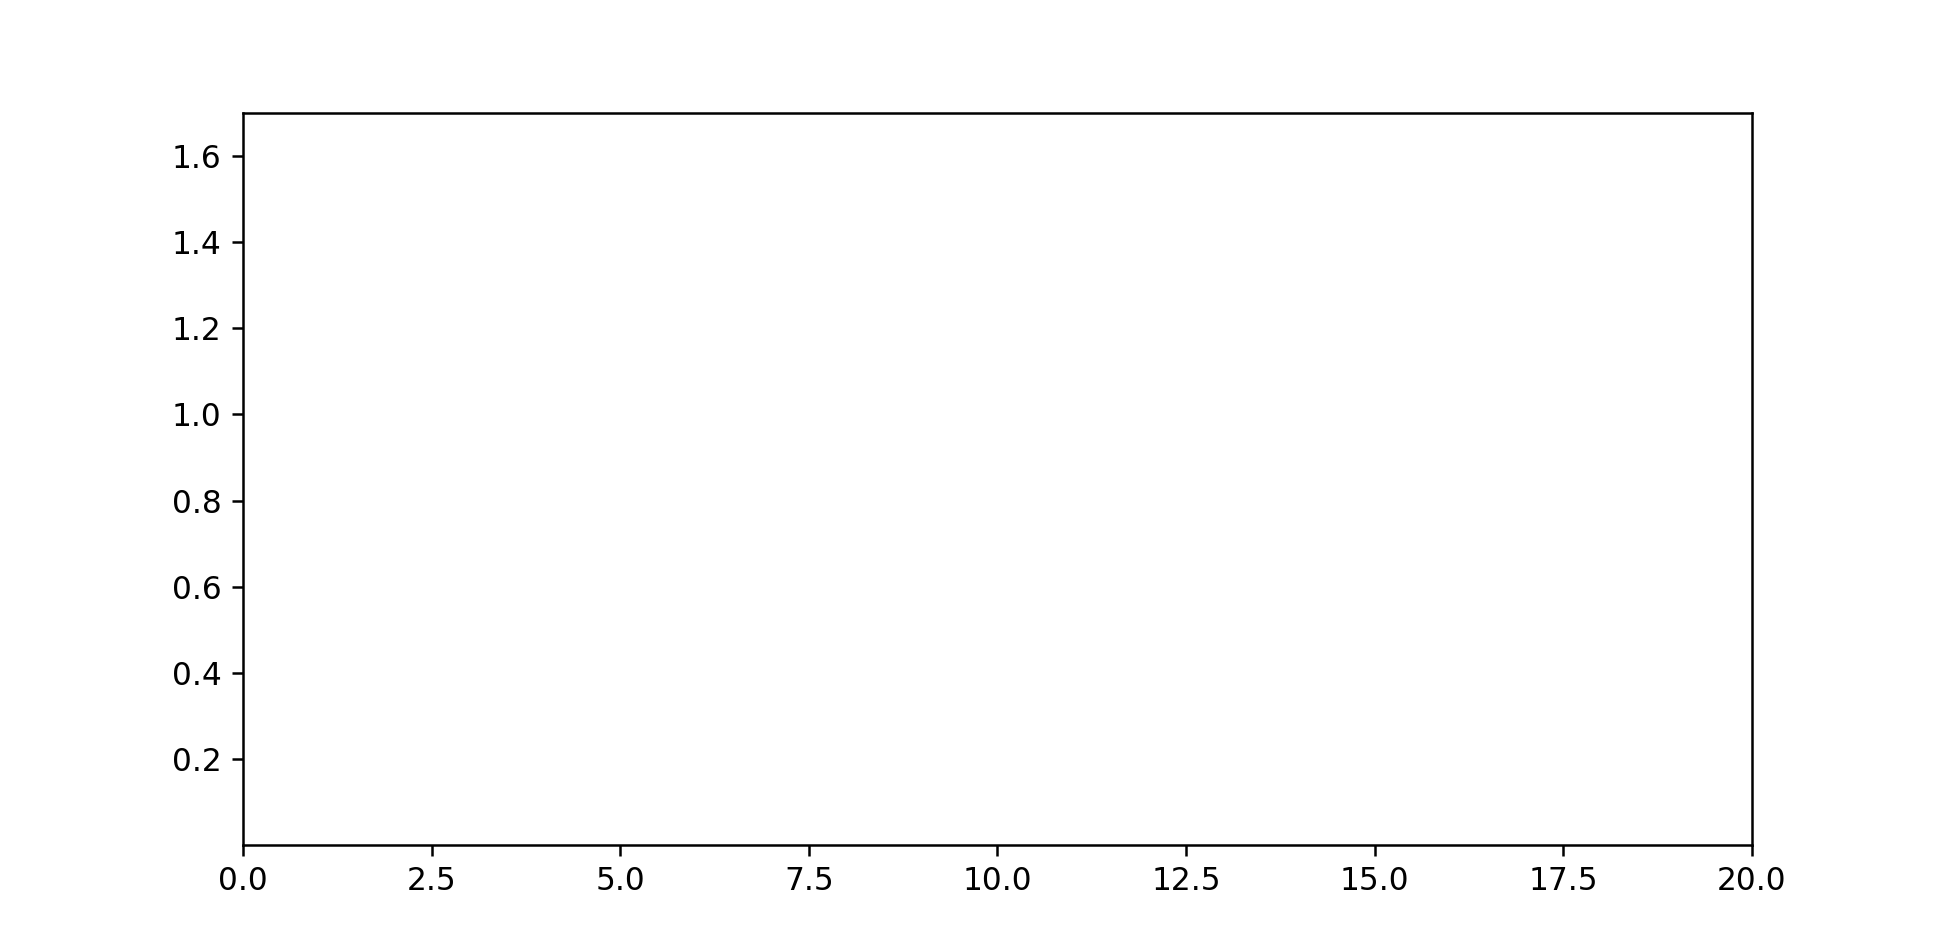

interactive(children=(IntSlider(value=0, description='t', max=30), Output()), _dom_classes=('widget-interact',…

In [12]:
%matplotlib notebook
graph(lambda t: log[t].rho[0:N-1],ymax=1.7)

<IPython.core.display.Javascript object>


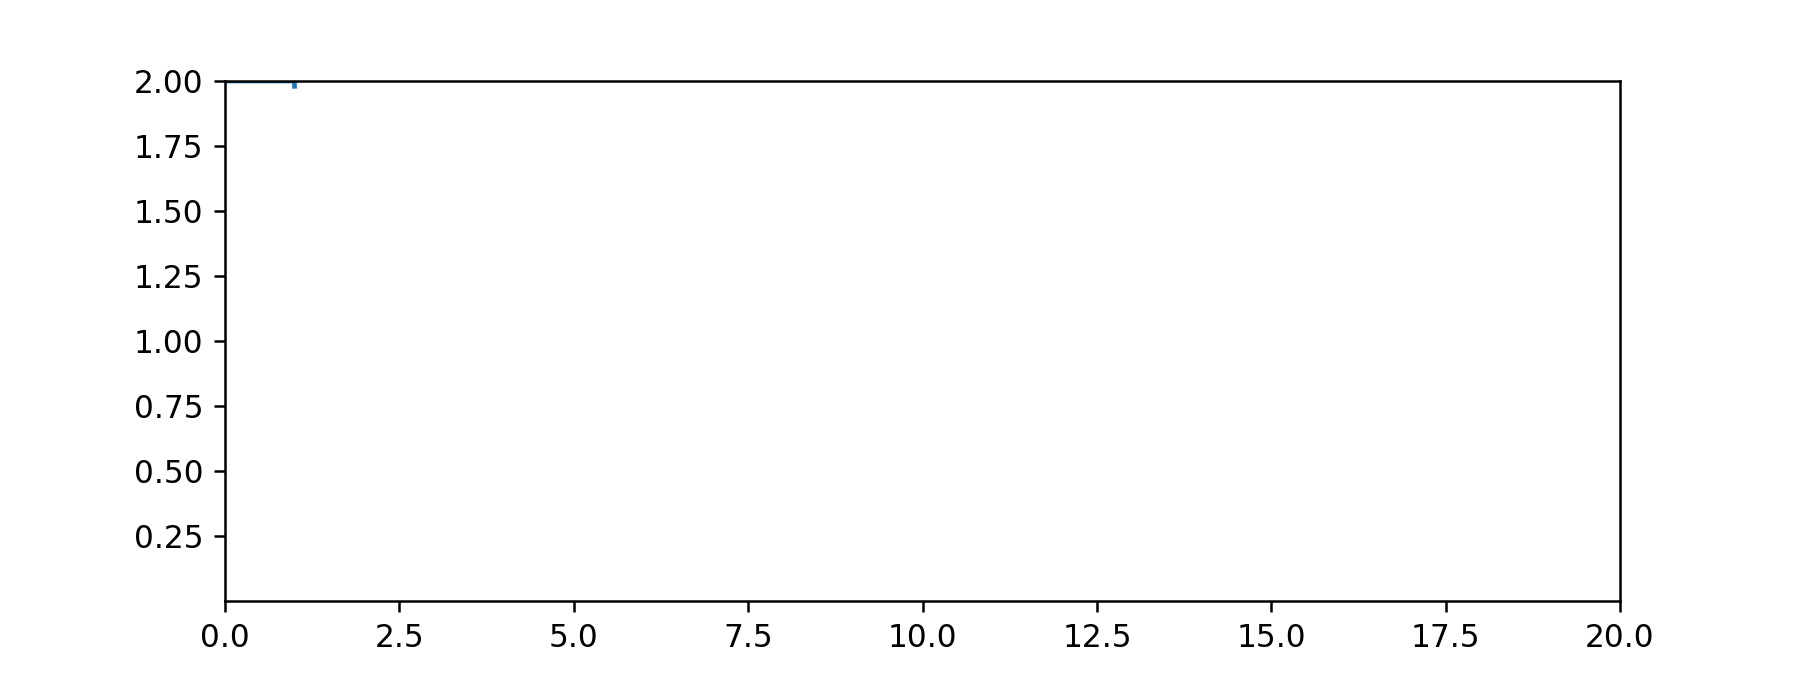

interactive(children=(IntSlider(value=0, description='t', max=30), Output()), _dom_classes=('widget-interact',…

In [11]:
graph(lambda t: log[t].p[0:N-1],ymax=2)

In [ ]:
graph(lambda t: log[t].eps[0:N-1],ymax=1.5)

In [ ]:
graph(lambda t: log[t].u[0:N-1],ymax=3)

In [ ]:
plt.figure(figsize=(5, 3))

i = [log[t].i1 for t in range(len(log))]
iterat = range(len(log))
plt.plot(iterat,i)
axes = plt.gca()
axes.set_ylim([0,5])
plt.xlabel("t")
plt.ylabel("i1")

In [ ]:
plt.figure(figsize=(5, 3))

i = [log[t].i2 for t in range(len(log))]
print(i)
iterat = range(len(log))
plt.plot(iterat,i)
axes = plt.gca()
axes.set_ylim([0,500])
plt.xlabel("t")
plt.ylabel("i2")

In [ ]:
plt.figure(figsize=(5, 3))

i = [log[t].i3 for t in range(len(log))]
iterat = range(len(log))
plt.plot(iterat,i)
axes = plt.gca()
axes.set_ylim([0,500])
plt.xlabel("t")
plt.ylabel("i3")